In [1]:
import pandas as pd
import numpy as np
from numpy import array
import matplotlib.pyplot as plt
import re

In [10]:
data = pd.read_csv('Plot1.csv')
data.index = pd.DatetimeIndex(data['index date'])
del data['index date']

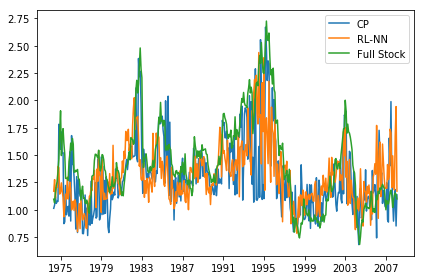

In [11]:
plt.plot(data['CP'])
plt.plot(data['RL-NN'])
plt.plot(data['Full Stock'])
plt.legend(loc='best', labels=['CP', 'RL-NN','Full Stock'])
plt.savefig('Real_methods.png', transparent=True, bbox_inches='tight')
plt.tight_layout()
plt.show()

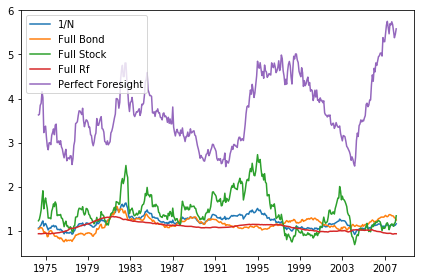

In [78]:
data = pd.read_csv('Plot2.csv')
data.index = pd.DatetimeIndex(data['index date'])
del data['index date']

plt.plot(data)
plt.legend(loc='best', labels=['1/N','Full Bond', 'Full Stock', 'Full Rf', 'Perfect Foresight'])
plt.savefig('ModelFree.png', transparent=True, bbox_inches='tight')
plt.tight_layout()
plt.show()

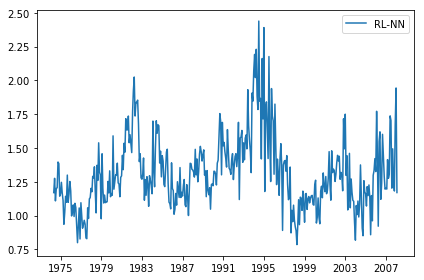

In [41]:
data = pd.read_csv('Plot1.csv')
data.index = pd.DatetimeIndex(data['index date'])
del data['index date']

plt.plot(data['RL-NN'])
plt.legend(loc='best', labels=data.columns.values)
plt.savefig('TW_RL.png', transparent=True, bbox_inches='tight')
plt.tight_layout()
plt.show()

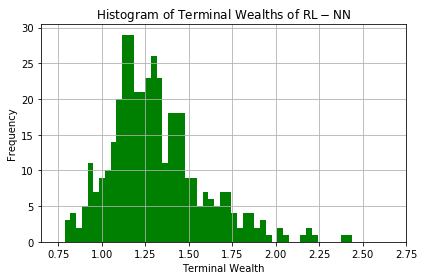

In [75]:
data = pd.read_csv('Plot1.csv')
data.index = pd.DatetimeIndex(data['index date'])
del data['index date']
x = data['RL-NN']

# the histogram of the data
# n, bins, patches = plt.hist(x, 50, normed=1, facecolor='green', alpha=0.75)
n, bins, patches = plt.hist(x, 50, facecolor='green')

ax = plt.gca()
ax.set_xlim(0.65,2.75)
plt.xlabel('Terminal Wealth')
plt.ylabel('Frequency')
plt.title(r'$\mathrm{Histogram\ of\ Terminal\ Wealths\ of\ RL-NN} $')
plt.grid(True)
# .set_xbound(lower=0.65, upper=2.75)
plt.savefig('Histogram_TW_RL.png', transparent=True, bbox_inches='tight',xlim=[0.65,2.75])
plt.tight_layout()
plt.show()

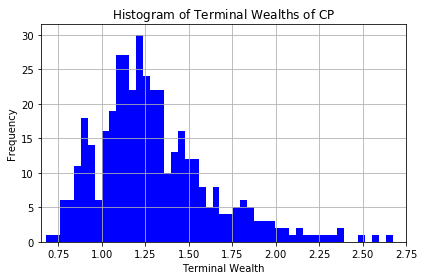

In [76]:
    data = pd.read_csv('Plot1.csv')
    data.index = pd.DatetimeIndex(data['index date'])
    del data['index date']
    x = data['CP']

    # the histogram of the data
    # n, bins, patches = plt.hist(x, 50, normed=1, facecolor='green', alpha=0.75)
    n, bins, patches = plt.hist(x, 50, facecolor='blue')

    ax = plt.gca()
    ax.set_xlim(0.65,2.75)
    plt.xlabel('Terminal Wealth')
    plt.ylabel('Frequency')
    plt.title(r'$\mathrm{Histogram\ of\ Terminal\ Wealths\ of\ CP}} $')
    plt.grid(True)
    plt.savefig('Histogram_TW_CP.png', transparent=True, bbox_inches='tight')
    plt.tight_layout()
    plt.show()

294
1.429107486


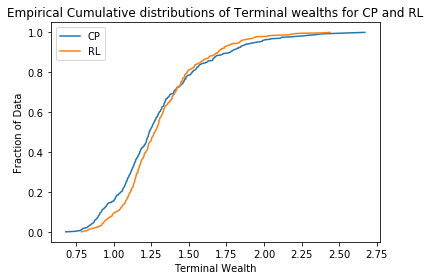

In [30]:
# Create CDFs Terminal Wealths

data = pd.read_csv('Plot1.csv')
data.index = pd.DatetimeIndex(data['index date'])
del data['index date']
cp = data['CP']
rl = data['RL-NN']


sorted_cp = np.sort(cp)
sorted_rl = np.sort(rl)
xo =sorted_cp < sorted_rl
print(int(len(xo)*np.mean(xo)))
print(sorted_cp[294])
plt.plot(sorted_cp, np.linspace(0,1,sorted_cp.size))
plt.plot(sorted_rl, np.linspace(0,1,sorted_rl.size))

plt.xlabel('Terminal Wealth')
plt.ylabel('Fraction of Data')
plt.legend(loc='best', labels=['CP','RL'])
plt.title('Empirical Cumulative distributions of Terminal wealths for CP and RL')
plt.savefig('CDF_TW_RLCP.png', transparent=True, bbox_inches='tight')
plt.tight_layout()

plt.show()

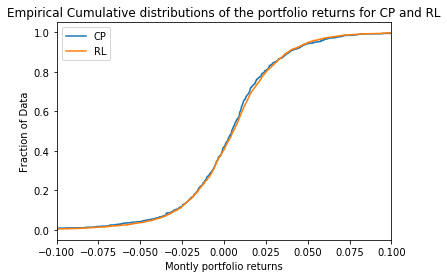

In [8]:
# Create CDFs Returns

data = pd.read_csv('Plot3_CDF.csv')
# data.index = pd.DatetimeIndex(data['index date'])
del data['index date']
cp0 = data['CP0']
cp2 = data['CP2']
rlutil = data['RLutil']
rl = data['RL']

resultList = []
for i in range(len(cp0)):
    text = cp0[i]
    if type(text) is str:
        candidates = re.findall(r"[+-]? *(?:\d+(?:\.\d*)?|\.\d+)(?:[eE][+-]?\d+)?", text)
        for i in range(len(candidates)):
            elem = float(candidates[i])
#             print(elem)
            if ((elem < 1) and (elem > -1)):
#                 print(elem)
                resultList.append(elem)
#         if text.find('-'):
#             print(re.findall(r"[+-]? *(?:\d+(?:\.\d*)?|\.\d+)(?:[eE][+-]?\d+)?", text))
#         else:
#             xo = eval('\n' + text + '\n')
#         for i in range(len(xo)):
#             elem = xo[i]
#             if type(elem) is str:
#                 elems = elem.split(' ')
#                 if (elems[1].isdigit()):
#                     resultList.append(elems[1])
#             elif type(elem) is float:
#                 resultList.append(elem)
                
sorted_cp = np.sort(resultList)

resultList = []
for i in range(len(cp2)):
    text = cp2[i]
    if type(text) is str:
        candidates = re.findall(r"[+-]? *(?:\d+(?:\.\d*)?|\.\d+)(?:[eE][+-]?\d+)?", text)
        for i in range(len(candidates)):
            elem = float(candidates[i])
#             print(elem)
            if ((elem < 1) and (elem > -1)):
#                 print(elem)
                resultList.append(elem)
#         if text.find('-'):
#             print(re.findall(r"[+-]? *(?:\d+(?:\.\d*)?|\.\d+)(?:[eE][+-]?\d+)?", text))
#         else:
#             xo = eval('\n' + text + '\n')
#         for i in range(len(xo)):
#             elem = xo[i]
#             if type(elem) is str:
#                 elems = elem.split(' ')
#                 if (elems[1].isdigit()):
#                     resultList.append(elems[1])
#             elif type(elem) is float:
#                 resultList.append(elem)
                
sorted_cp2 = np.sort(resultList)


resultList = []
for i in range(len(rl)):
    text = rl[i]
    if type(text) is str:
        xo = eval('array([' + text + '])')
        for elem in xo[0]:
            resultList.append(elem[0])
            
sorted_rl = np.sort(resultList)

resultList = []
for i in range(len(rlutil)):
    text = rlutil[i]
    if type(text) is str:
        xo = eval('array([' + text + '])')
        for elem in xo[0]:
            resultList.append(elem[0])

sorted_rlutil = np.sort(resultList)

plt.plot(sorted_cp2, np.linspace(0,1,sorted_cp2.size))
plt.plot(sorted_rl, np.linspace(0,1,sorted_rl.size))
# plt.plot(sorted_rlutil, np.linspace(0,1,sorted_rlutil.size))
# plt.plot(sorted_cp, np.linspace(0,1,sorted_cp.size))
plt.xlabel('Montly portfolio returns')
plt.ylabel('Fraction of Data')
plt.legend(loc='best', labels=['CP','RL'])
plt.title('Empirical Cumulative distributions of the portfolio returns for CP and RL')
plt.savefig('CDF_PR_RLCP.png', transparent=True, bbox_inches='tight')
plt.xlim(-0.10, 0.10)
plt.show()

# fig=plt.figure()
# ax=fig.add_subplot(111)
# ax.plot(x_data,y_data)
# ax.set_xbound(lower=0.0, upper=1000)
# plt.savefig(filename)




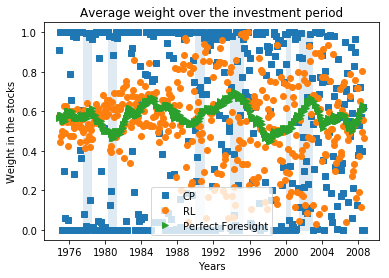

In [53]:
# Weights and Crisis plots

data = pd.read_csv('WeightsPlot2.csv')
data.index = pd.DatetimeIndex(data['Index Date'])
del data['Index Date']
cp = data['CP']
rl = data['RL']
pf = data['Perfect Foresight']
crises = data['Crises']

plt.plot(cp, 's')
plt.plot(rl, 'o')
plt.plot(pf, '>')

for i in range(len(crises)):
    tempi = 0
    if ((crises[i] == 1) and (i > tempi)):
        beginx = data.index[i]
        begini = i
        tempi = i
        while (crises[tempi] == 1):
            tempi += 1
            endx = data.index[tempi]
            endi = i
        plt.fill_between([beginx,endx], y1=0,y2=1, color = "#e0eaf3")

#         plt.margins(0)
plt.legend(loc='best', labels=['CP', 'RL', 'Perfect Foresight'])
plt.xlabel('Years')
plt.ylabel('Weight in the stocks')
plt.title('Average weight over the investment period')
plt.savefig('Average_Weights.png', transparent=True, bbox_inches='tight')
plt.show()
